# Clase tipo 2 - Diplomado ciencia de datos

## Descripción preliminar del documento

In [4]:
#Tarea 4 - Diplomado Ciencia de datos
#Autor: Germán Camilo Rodríguez Perilla
#Clase2: Objeto con funcionalidades sobre una base de datos 

## Especificación de los paquetes a usar y del directorio de trabajo 

In [1]:
# Importación de bibliotecas
import pandas as pd
import os 
import matplotlib.pyplot as plt

# Dirección del directorio de trabajo
directory = os.path.expanduser('~/Documents/DIplomados/Diplomado-Ciencia-de-Datos/Tarea4')

# Especificar el directorio de trabajo donde se encuentra la base de datos 
os.chdir(directory)

## Definición de la clase *DescripcionBaseDatos*

In [2]:
class DescripcionBaseDatos:
    
    def __init__(self, nombre_datos):
        
        # Se importa directamente la base de datos para leer
        self.datos = pd.read_csv(nombre_datos)    

    # Función para generar estadística descriptivas sobre la base de datos 
    def estadistica_desciptivas(self):
        if self.datos is not None:
            return self.datos.describe()
        else:
            return None

    # Función para recuperar los nombres de las variables dentro de la base de datos
    def nombre_variables(self):
        if self.datos is not None:
            return list(self.datos.columns)
        else:
            return None

    # Función para analizar variables 
    def analizar_variables(self, nombre_variable):
        if self.datos is not None:
            if nombre_variable in self.datos.columns:
                variable_data = self.datos[nombre_variable]
                estadisticos = {
                    "Media": variable_data.mean(),
                    "Mediana": variable_data.median(),
                    "Desviación estándar": variable_data.std(),
                    "Pecentil q25": variable_data.quantile(0.25),
                    "Pecentil q50": variable_data.median(),
                    "Pecentil q75": variable_data.quantile(0.75),
                }

                # Graficació del histograma
                plt.figure(figsize=(8, 6))
                plt.hist(variable_data, bins=20, color='skyblue', edgecolor='black')
                plt.title(f'Distribución de {nombre_variable}')
                plt.xlabel(nombre_variable)
                plt.ylabel('Frecuencia')
                plt.grid(True)
                plt.show()

                return estadisticos
            else:
                return f"Variable '{nombre_variable}' no se encuentra en la base de datos."
        else:
            return "DataFrame no está disponible."

## Prueba de la clase *DescripcionBaseDatos*

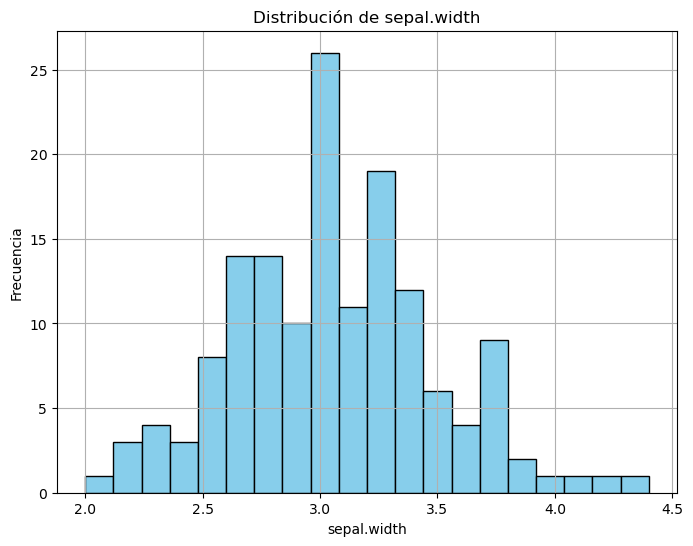

{'Media': 3.0573333333333337,
 'Mediana': 3.0,
 'Desviación estándar': 0.435866284936698,
 'Pecentil q25': 2.8,
 'Pecentil q50': 3.0,
 'Pecentil q75': 3.3}

In [3]:
# Creo una instancia de la clase con la base de datos "iris"
iris_base = DescripcionBaseDatos("iris.csv")

# Implementación de un método que calcula estadística descriptivas para cada una de las variables
iris_base.estadistica_desciptivas()

# Implementación de un método que entregue los nombres de las variables disponibles
iris_base.nombre_variables()

# Implementación del método que recibe el nombre de la variable y cálcula estadística descriptivas, 
# así como realiza un histograma de la distribución de la variable. Se analiza la variable "sepal.width"
iris_base.analizar_variables("sepal.width")    